<a href="https://colab.research.google.com/github/krmonline/AnomalyDetection/blob/master/Anomaly_Letter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

In [7]:
!wget https://github.com/krmonline/AnomalyDetection/raw/master/letter.mat

--2020-08-08 19:24:05--  https://github.com/krmonline/AnomalyDetection/raw/master/letter.mat
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/krmonline/AnomalyDetection/master/letter.mat [following]
--2020-08-08 19:24:05--  https://raw.githubusercontent.com/krmonline/AnomalyDetection/master/letter.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23146 (23K) [application/octet-stream]
Saving to: ‘letter.mat.1’

letter.mat.1        100%[===================>]  22.60K  --.-KB/s    in 0.01s   

2020-08-08 19:24:05 (1.83 MB/s) - ‘letter.mat.1’ saved [23146/23146]



In [11]:
f = scipy.io.loadmat('letter.mat')

In [13]:
X = f.get('X')
y = f.get('y')
X = np.array(X) # For converting to a NumPy array
y = np.array(y)

In [57]:
dfX = pd.DataFrame(X)

In [15]:
X.shape,y.shape

((1600, 32), (1600, 1))

In [16]:
from sklearn.decomposition import  PCA

In [20]:
X2 = PCA(n_components=3).fit_transform(X)

In [30]:
X2.shape,y.shape

((1600, 3), (1600, 1))

In [33]:
df = pd.DataFrame(X2)
label = pd.DataFrame(y)
df['label'] = label[0].values
df.label = df.label.astype('int64')
df

,0,1,2,label
0,-3.351119,-1.325486,-4.510206,0
1,-6.762503,-1.837115,5.842649,0
2,-6.143649,6.226966,1.211651,0
3,-7.909054,4.304185,4.259787,0
4,-8.206218,2.532668,6.720400,0
...,...,...,...,...
1595,-4.761516,7.747586,7.979358,1
1596,-1.714259,-0.645442,-6.087254,1
1597,-2.198676,0.934126,-1.519782,1
1598,-2.424503,-4.967541,-8.313585,1


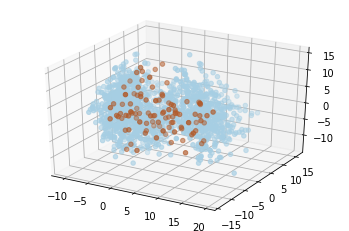

In [34]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[0],df[1],df[2],c=df['label'],cmap='Paired')
#ax.scatter(df[0],df[1],df[2],cmap='Paired')

In [35]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


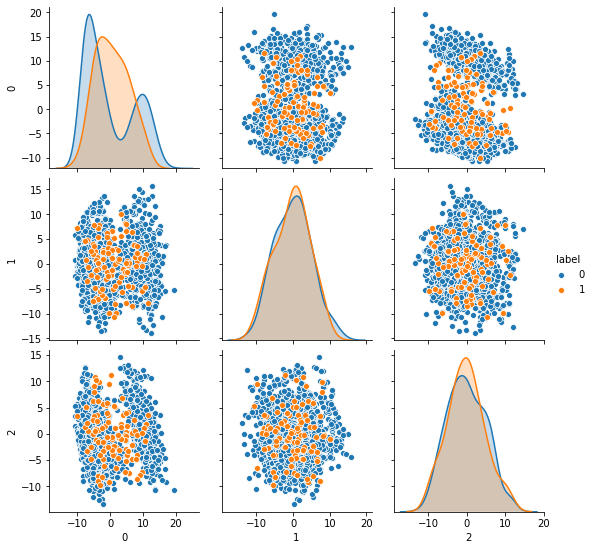

In [40]:
sns.pairplot(df,hue='label')

In [55]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(dfX, y, test_size=0.33, random_state=42)
X_val,X_test,y_val,y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [111]:
len(y_train[y_train==1]),len(y_val[y_val==1]),len(y_test[y_test==1])

(67, 15, 18)

In [112]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
acc = []
loss = []
val_acc = []
val_loss = []

In [113]:
h = model.fit(X_train,y_train,epochs=200,validation_data=(X_val,y_val))
acc = acc + h.history['accuracy']
loss = loss + h.history['loss']
val_acc = val_acc + h.history['val_accuracy']
val_loss = val_loss + h.history['val_loss']

Epoch 1/200
34/34 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.8927 - val_loss: 0.4800 - val_accuracy: 0.8864
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.9179 - val_loss: 0.3535 - val_accuracy: 0.9432
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.9226 - val_loss: 0.2992 - val_accuracy: 0.9432
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2752 - accuracy: 0.9366 - val_loss: 0.2687 - val_accuracy: 0.9394
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2481 - accuracy: 0.9384 - val_loss: 0.2636 - val_accuracy: 0.9242
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2465 - accuracy: 0.9356 - val_loss: 0.2571 - val_accuracy: 0.9205
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2140 - accuracy: 0.9356 - val_loss: 0.2235 - val_accuracy: 0.9394
Epoch 8/200
3

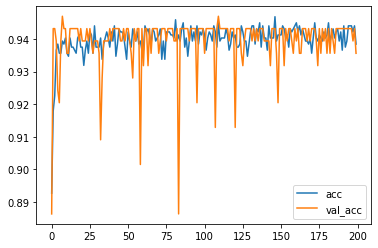

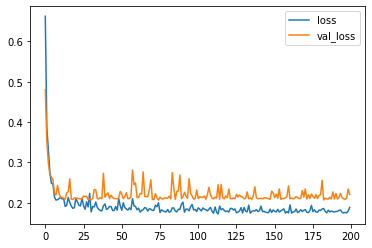

In [114]:
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['acc','val_acc'])
plt.show()
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.show()

In [115]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [117]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [120]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       246
           1       0.91      0.56      0.69        18

    accuracy                           0.97       264
   macro avg       0.94      0.78      0.84       264
weighted avg       0.96      0.97      0.96       264



In [128]:
tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

In [129]:
tn, fp, fn, tp

(245, 1, 8, 10)